In [1]:
#import the libraries we used
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

C:\Users\asus\AppData\Local\Temp\ipykernel_33184\3407920583.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


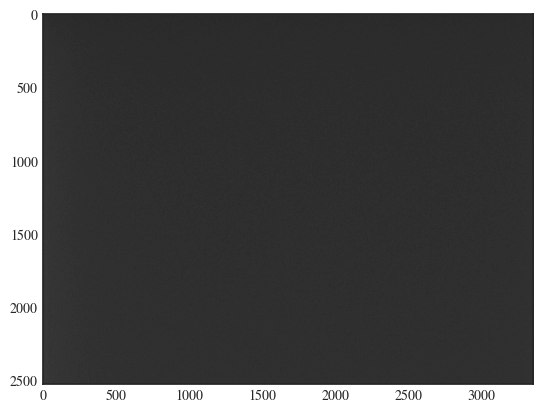

In [2]:
#check the flat frame, select a region with low std and minimal hot pixel/traps
bias = fits.open("D:/Observational Data/2023-03-24 Flat/Target/BIAS/Target_BIAS_V_1x1_0.20s_0001.fits")
bias = bias[0].data
plt.imshow(bias, cmap='gray', norm='linear')

In [3]:
# readout noise and mean bias level from bias images for selected region
ron_bias, mean_bias_level = [],[]
for i in range(10):
    bias = fits.open(f"D:/Observational Data/2023-03-24 Flat/Target/BIAS/Target_BIAS_V_1x1_0.20s_000{i+1}.fits")
    bias = bias[0].data
    std_bias, mean_bias = np.std(bias[1000:2000,1000:2000]), np.mean(bias[1000:2000,1000:2000])
    ron_bias.append(std_bias)
    mean_bias_level.append(mean_bias)
print(f"the readout noise = {np.round(np.mean(ron_bias),3)} \u00B1 {np.round(np.std(ron_bias),3)} ADU")
print(f"the mean bias level = {np.round(np.mean(mean_bias_level),3)} \u00B1 {np.round(np.std(mean_bias_level),3)} ADU")

the readout noise = 24.324 ± 0.055 ADU
the mean bias level = 338.095 ± 1.299 ADU


In [4]:
# making a mean row and column for median stacked bias images aka masterbias
masterbias = fits.open("D:/Observational Data/2023-03-24 Flat/Target/BIAS/masterbias.fits")
masterbias = masterbias[0].data
df = pd.DataFrame(masterbias)
mean_column_bias, mean_row_bias = [], []
for column in df:
    mean_column_bias.append(np.mean(df[column]))
df1 = pd.DataFrame.transpose(df)
for row in df1:
    mean_row_bias.append(np.mean(df1[row]))

[Text(0.5, 1.0, 'Mean bias column'),
 Text(0.5, 0, 'column number'),
 Text(0, 0.5, 'ADU')]

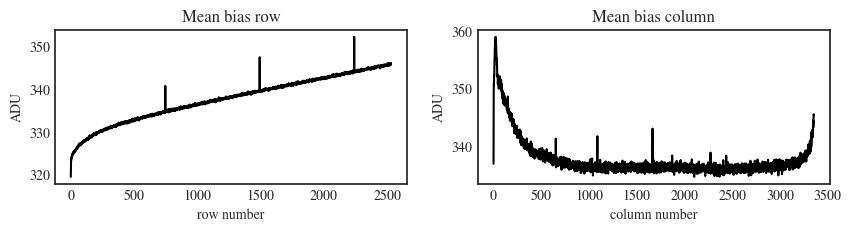

In [5]:
x = np.linspace(0,3354,3354)
x1 = np.linspace(0,2529,2529)
fig, ax = plt.subplots(1,2,figsize=(10,2))
#fig.subplots_adjust(hspace=0.7)
ax[0].plot(x1,mean_row_bias,'k')
ax[0].set(title="Mean bias row", xlabel='row number',ylabel='ADU')
ax[1].plot(x,mean_column_bias,'k')
ax[1].set(title="Mean bias column", xlabel='column number', ylabel='ADU')
#plt.savefig("ALTS-Mean bias row and column.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [ ]:
#bias = fits.open("D:/Observational Data/2023-03-24 Flat/Target/BIAS/Target_BIAS_V_1x1_0.20s_0001.fits")
#masterbias = bias[0].data
#data = masterbias[1000:2000,1000:2000]
#fig, ax = plt.subplots(figsize=(6,4))
#ax.hist(data,bins=np.arange(data.min(), data.max()+1), width=0.2)
#ax.set(title='Histogram, median stacked bias image', xlabel="ADU", ylabel='Frequency')
#,bins=np.arange(data.min(), data.max()+1), 
#plt.savefig("ALTS-histogram single bias.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [6]:
#make an array for the mean counts, half variance, and exp time
exp_time = [0.50,1.00,2.00,3.00,4.00,6.00,7.00,8.00,10.00,11.00,14.00,15.00,16.00]

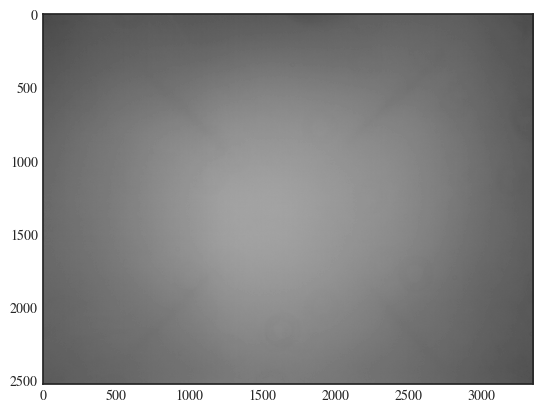

In [7]:
#check the flat frame, select a region with low std and minimal hot pixel/traps
flats = fits.open("D:/Observational Data/2023-03-24 Flat/Target/LIGHT/light clean/Target_LIGHT_V_1x1_14.0s_0000.fits")
flat = flats[0].data
plt.imshow(flat, cmap='gray', norm='log')

In [9]:
mean_count = []
#extract the mean counts from flat frames for selected region
for i, n in enumerate(exp_time):
    for z in range(1):
        flatawal = fits.open(f"D:/Observational Data/2023-03-24 Flat/Target/LIGHT/light clean/Target_LIGHT_V_1x1_{n}s_0000.fits")
        flatawal = flatawal[0].data
        mean_flat = np.mean(flatawal[1000:2000,500:1000])
        mean_count.append(mean_flat)
print(mean_count)
print(len(mean_count))

[2224.234626, 4132.686338, 7861.340002, 11560.483616, 14384.87053, 21700.298744, 25269.74598, 29204.208694, 36005.729918, 39268.87006, 50274.07845, 53461.656494, 57105.222064]
13


In [10]:
variance_flat = []
#extract the half variance of substracted flat frames
for i, n in enumerate(exp_time):
    for z in range(1):
        flatakhir = fits.open(f"D:/Observational Data/2023-03-24 Flat/Target/LIGHT/light clean/Target_LIGHT_V_1x1_{n}s_0000.fits")
        flatawal = fits.open(f"D:/Observational Data/2023-03-24 Flat/Target/LIGHT/light clean/Target_LIGHT_V_1x1_{n}s_0000(1).fits")
        flatawal, flatakhir = flatawal[0].data, flatakhir[0].data
        substract_flat = np.array((flatawal[1000:2000,500:1000]), dtype=float) - np.array((flatakhir[1000:2000,500:1000]),dtype=float)
        var_flat = 0.5 * (np.var((substract_flat)))
        variance_flat.append(var_flat)
print(variance_flat)
#print(len(variance_flat))

[5427.238447728886, 9522.968859992628, 17540.150409774425, 24733.4031988339, 31220.95541519009, 46434.79822804985, 53808.71271148864, 61884.41352474502, 75737.80951153357, 82072.73854629876, 103866.96798938105, 109807.93172056678, 116564.62321410506]


In [11]:
#make a dataframe for the data to plot
data = {'exp time': exp_time, 'mean counts': mean_count, 'half variance': variance_flat}
df = pd.DataFrame(data)
df

,exp time,mean counts,half variance
0,0.5,2224.234626,5427.238448
1,1.0,4132.686338,9522.968860
2,2.0,7861.340002,17540.150410
3,3.0,11560.483616,24733.403199
4,4.0,14384.870530,31220.955415
5,6.0,21700.298744,46434.798228
6,7.0,25269.745980,53808.712711
7,8.0,29204.208694,61884.413525
8,10.0,36005.729918,75737.809512
9,11.0,39268.870060,82072.738546


Gradient of the slope = 2.032
The y-intercept = 1714.618


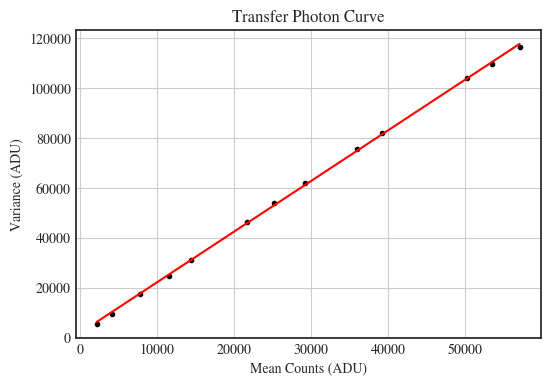

In [12]:
#linear regression for the transfer photon curve
from sklearn.linear_model import LinearRegression

#select mean counts as x and half variance as y
x = df['mean counts'].values.reshape(-1,1)
y = df['half variance'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,c='k',marker='.')
ax.plot(x,y_predict,'r-')
ax.set(title='Transfer Photon Curve', xlabel='Mean Counts (ADU)', ylabel='Variance (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef_slope = model.coef_[0,0]
const_y = model.intercept_[0]

#print the results
print(f'Gradient of the slope = {np.round(coef_slope,3)}')
print(f'The y-intercept = {np.round(const_y,3)}')
#save the figure
#plt.savefig("ALTS-Transfer Photon Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [13]:
#define the formula for the ccd parameter from the photon transfer curve
conv_fact = 1/coef_slope #the conversion factor or Gain formula
adc_value = 2**16 #12 bit of A/D Converter
readout_noise = np.sqrt(np.abs(const_y)) / coef_slope #readout noise formula
full_well = (adc_value-1) / coef_slope #full well capacity formula
d_r = full_well / readout_noise #dynamic range formula
enob = np.log10(d_r)/np.log10(2) #effective number of bit formula
d_r_db = 20 * np.log10(d_r) #dynamic range in dB
ron = np.mean(ron_bias) * conv_fact
#print the result
print('Parameter of the CCD')
print(f'Conversion factor or Gain = {np.round(conv_fact,3)} e-/ADU')
print(f'Readout Noise from Transfer Photon Curve = {np.round(readout_noise,3)} e-/px')
print(f'Readout Noise from a bias image = {np.round(ron,3)} e-/px')
print(f'Full Well Capacity = {np.round(full_well,0)} e-')
print(f'Dynamic Range = {np.round(d_r,2)}')
print(f'Dynamic Range in dB = {np.round(d_r_db,1)} dB')
print(f'Effective Number of Bit = {np.round(enob,0)} bit')

Parameter of the CCD
Conversion factor or Gain = 0.492 e-/ADU
Readout Noise from Transfer Photon Curve = 20.374 e-/px
Readout Noise from a bias image = 11.968 e-/px
Full Well Capacity = 32245.0 e-
Dynamic Range = 1582.67
Dynamic Range in dB = 64.0 dB
Effective Number of Bit = 11.0 bit


The Gradient of the Slope = 3531.71
R Square = 0.9998744102463968


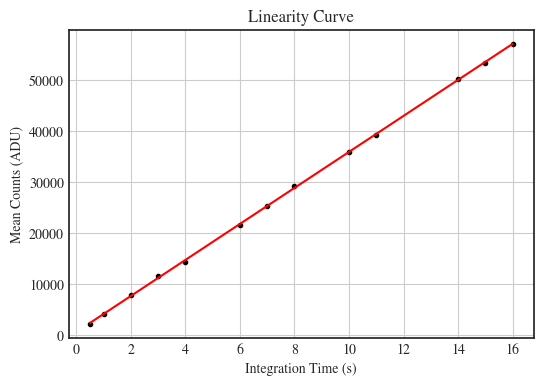

In [14]:
#linear regression for the linearity curves
#exp time as x and mean counts as y
xb = df['exp time'].values.reshape(-1,1)
yb = df['mean counts'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xb,yb)
y_predict = model.predict(xb)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xb,yb,c='k',marker='.')
ax.plot(xb,y_predict,'r-')
ax.set(title='Linearity Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef = model.coef_[0,0]
print(f'The Gradient of the Slope = {np.round(coef,3)}')
print(f'R Square = {model.score(xb,yb)}')
#plt.savefig("ALTS-Linearity Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [27]:
#array for the dark current
dark_current, dark_current_region = [], []
exp_time = [0.5,1.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,14.0,15.0,16.0]
#calculate the mean of dark frames
for i, n in enumerate(exp_time):
    for z in range(1):
        darks = fits.open(f"D:/Observational Data/2023-03-24 Flat/Target/DARK/Target_DARK_V_1x1_{n}s_0000.fits")
        dark_image = darks[0].data
        mean_dark = np.mean(dark_image)
        dark_reg = np.mean(dark_image[1000:2000,500:1000])
        dark_current.append(mean_dark)
        dark_current_region.append(dark_reg)
print(dark_current)
print(len(dark_current))

[337.23996205730873, 337.26453131745694, 337.8041853438692, 341.279130953922, 338.0368620837875, 338.48492513675, 338.5426938980692, 339.1964674298118, 340.02462655615847, 339.98471894184877, 341.1034887375614, 341.4192541238391, 345.85399950909346]
13


In [26]:
#make a dataframe
data2 = {'exp time': exp_time, 'mean dark count': dark_current, 'mean dark region': dark_current_region}
df2 = pd.DataFrame(data2)
df2

,exp time,mean dark count,mean dark region
0,0.5,337.239962,331.450400
1,1.0,337.264531,331.219500
2,2.0,337.804185,331.158475
3,3.0,341.279131,338.965450
4,4.0,338.036862,331.154625
5,6.0,338.484925,331.648950
6,7.0,338.542694,331.872525
7,8.0,339.196467,332.235450
8,10.0,340.024627,332.697800
9,11.0,339.984719,332.828475


Gradient of the slope = 0.29441109104046326
Intercept = 331.2530648941196
R Square = 0.23076482364211037


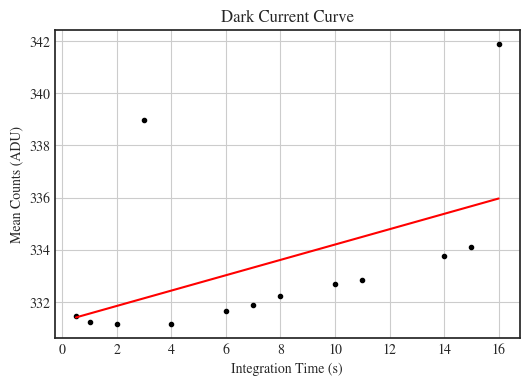

In [30]:
#linear regression for the dark current
xc = df2['exp time'].values.reshape(-1,1)
yc = df2['mean dark region'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xc,yc)
y_predict_c = model.predict(xc)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xc,yc,c='k',marker='.')
ax.plot(xc,y_predict_c,'r-')
ax.set(title='Dark Current Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define coef
coef_dark = model.coef_[0,0]
intercept_y_dark = model.intercept_[0]
print(f'Gradient of the slope = {coef_dark}')
print(f'Intercept = {intercept_y_dark}')
print(f'R Square = {model.score(xc,yc)}')
#plt.savefig("ALTS-Dark Current Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [31]:
dark_cur = coef_dark * conv_fact #dark current formula
bias_lev = intercept_y_dark * dark_cur #bias level formula

#print the result
print(f'Dark Current of the CCD = {np.round(dark_cur,3)} e-/s/pix')
print(f'Bias Level = {np.round(bias_lev,3)} e-/pix')

Dark Current of the CCD = 0.145 e-/s/pix
Bias Level = 47.985 e-/pix


In [ ]:
#make a contour for dark images
dark_30s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/dark-30s-1.tiff", plugin="tifffile")
dark_60s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/dark-60s-1.tiff", plugin="tifffile")
df4 = pd.DataFrame(dark_30s)
df5 = pd.DataFrame(dark_60s)

In [ ]:
x0 = np.linspace(0,656,656)
y0 = np.linspace(0,492,492)
X, Y = np.meshgrid(x0,y0)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.contourf(X,Y, df4, cmap='hot', alpha=1)
fig.colorbar(cp) 
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 30s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.contourf(X,Y, df5, cmap='hot', alpha=1)
fig.colorbar(cp) 
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 60s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [ ]:
#plot surface and contour for flat frames
from matplotlib.ticker import LinearLocator

flat_variasi = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/masterflat_variasi.tiff", plugin="tifffile")
df6 = pd.DataFrame(flat_variasi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
Z = df6

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap='viridis', linewidth=1, vmax=1.01)
#fig.colorbar(surf, shrink=0.4, aspect=10)
# Customize the axis and label
ax.set(xlabel='X (pixel)', ylabel='Y (pixel)', xlim=(692,0),zlim=(0.9,1.1))
ax.set_zlabel('ADU', rotation='vertical')
ax.view_init(30, 65, 0)
ax.set_box_aspect(None, zoom=0.85)
plt.show()
plt.savefig("ALTS-Surface Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [1]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
cp = ax.contourf(X, Y, Z, cmap='hot', vmin=0, vmax=1.5)
cbar = plt.colorbar(cp)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-Countour Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

NameError: name 'plt' is not defined